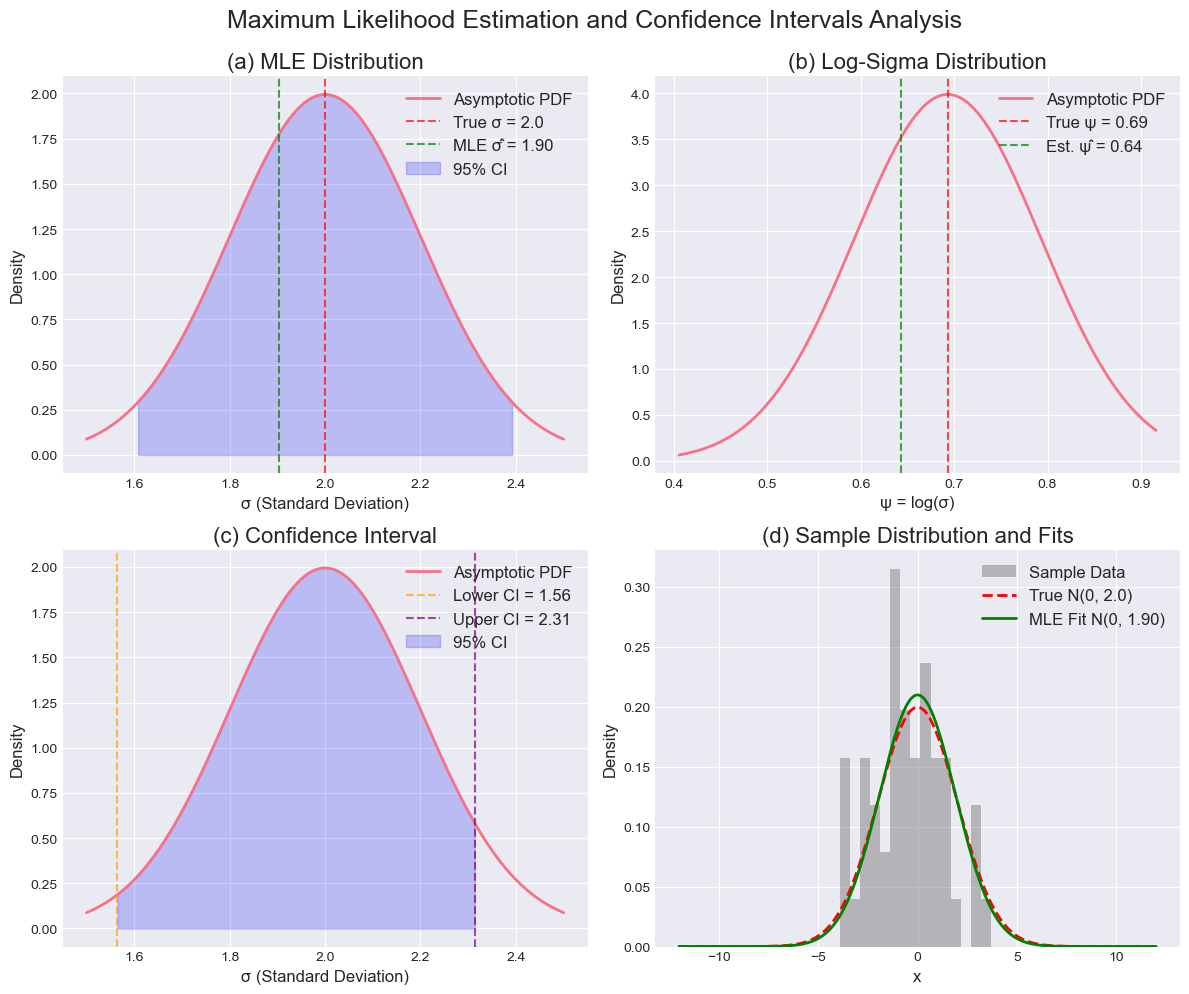


Numerical Results:
True σ: 2.0000
MLE σ̂: 1.9028
95% Confidence Interval for σ: (1.5641, 2.3148)
True ψ = log(σ): 0.6931
Estimated ψ̂ = log(σ̂): 0.6433


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Set the style for more professional looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set consistent font sizes
SMALL_SIZE = 10
MEDIUM_SIZE = 12
LARGE_SIZE = 14
TITLE_SIZE = 16

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=TITLE_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=LARGE_SIZE)

# Set parameters
true_sigma = 2.0  # True standard deviation
n = 50  # Sample size
num_points = 1000  # Number of points for smooth curves

# Generate sample data and MLE
np.random.seed(42)  # For reproducibility
data = np.random.normal(loc=0, scale=true_sigma, size=n)
mle_sigma = np.sqrt(np.sum((data - 0)**2) / n)

# Create figure with consistent size and DPI
fig_width = 12
fig_height = 10
dpi = 100

# Part (a): Distribution of MLE of sigma
sigma_values = np.linspace(1.5, 2.5, num_points)
mle_pdf = norm.pdf(sigma_values, loc=true_sigma, scale=np.sqrt(true_sigma**2 / (2 * n)))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(fig_width, fig_height), dpi=dpi)
fig.suptitle('Maximum Likelihood Estimation and Confidence Intervals Analysis', 
             fontsize=TITLE_SIZE+2, y=0.99)

# Plot 1: MLE of sigma
ax1.plot(sigma_values, mle_pdf, label="Asymptotic PDF", linewidth=2)
ax1.axvline(x=true_sigma, color='red', linestyle='--', 
            label=f"True σ = {true_sigma}", alpha=0.7)
ax1.axvline(x=mle_sigma, color='green', linestyle='--', 
            label=f"MLE σ̂ = {mle_sigma:.2f}", alpha=0.7)

# Add shaded region for 95% confidence interval
ci_range = norm.interval(0.95, loc=true_sigma, scale=np.sqrt(true_sigma**2 / (2 * n)))
ax1.fill_between(sigma_values, mle_pdf, 
                 where=(sigma_values >= ci_range[0]) & (sigma_values <= ci_range[1]),
                 alpha=0.2, color='blue', label='95% CI')

ax1.set_title('(a) MLE Distribution')
ax1.set_xlabel('σ (Standard Deviation)')
ax1.set_ylabel('Density')
ax1.legend(loc='upper right', framealpha=0.9)

# Part (b): Delta Method for Log-Sigma
psi_values = np.log(sigma_values)
psi_pdf = norm.pdf(psi_values, loc=np.log(true_sigma), scale=np.sqrt(1 / (2 * n)))

ax2.plot(psi_values, psi_pdf, linewidth=2, label="Asymptotic PDF")
ax2.axvline(x=np.log(true_sigma), color='red', linestyle='--', 
            label=f"True ψ = {np.log(true_sigma):.2f}", alpha=0.7)
psi_hat = np.log(mle_sigma)
ax2.axvline(x=psi_hat, color='green', linestyle='--', 
            label=f"Est. ψ̂ = {psi_hat:.2f}", alpha=0.7)

ax2.set_title('(b) Log-Sigma Distribution')
ax2.set_xlabel('ψ = log(σ)')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right', framealpha=0.9)

# Part (c): Confidence Interval Transformation
z_critical = 1.96
psi_lower = psi_hat - z_critical * np.sqrt(1 / (2 * n))
psi_upper = psi_hat + z_critical * np.sqrt(1 / (2 * n))
sigma_lower = np.exp(psi_lower)
sigma_upper = np.exp(psi_upper)

ax3.plot(sigma_values, mle_pdf, linewidth=2, label="Asymptotic PDF")
ax3.axvline(x=sigma_lower, color='orange', linestyle='--', 
            label=f"Lower CI = {sigma_lower:.2f}", alpha=0.7)
ax3.axvline(x=sigma_upper, color='purple', linestyle='--', 
            label=f"Upper CI = {sigma_upper:.2f}", alpha=0.7)

# Add shaded region between confidence bounds
ax3.fill_between(sigma_values, mle_pdf, 
                 where=(sigma_values >= sigma_lower) & (sigma_values <= sigma_upper),
                 alpha=0.2, color='blue', label='95% CI')

ax3.set_title('(c) Confidence Interval')
ax3.set_xlabel('σ (Standard Deviation)')
ax3.set_ylabel('Density')
ax3.legend(loc='upper right', framealpha=0.9)

# Part (d): Sample Distribution and MLE Fit
sample_range = np.linspace(-6*true_sigma, 6*true_sigma, num_points)
true_pdf = norm.pdf(sample_range, loc=0, scale=true_sigma)
mle_pdf_fit = norm.pdf(sample_range, loc=0, scale=mle_sigma)

ax4.hist(data, bins=15, density=True, alpha=0.5, color='gray', label='Sample Data')
ax4.plot(sample_range, true_pdf, 'r--', label=f'True N(0, {true_sigma})', linewidth=2)
ax4.plot(sample_range, mle_pdf_fit, 'g-', label=f'MLE Fit N(0, {mle_sigma:.2f})', linewidth=2)

ax4.set_title('(d) Sample Distribution and Fits')
ax4.set_xlabel('x')
ax4.set_ylabel('Density')
ax4.legend(loc='upper right', framealpha=0.9)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Print numerical results for educational purposes
print("\nNumerical Results:")
print(f"True σ: {true_sigma:.4f}")
print(f"MLE σ̂: {mle_sigma:.4f}")
print(f"95% Confidence Interval for σ: ({sigma_lower:.4f}, {sigma_upper:.4f})")
print(f"True ψ = log(σ): {np.log(true_sigma):.4f}")
print(f"Estimated ψ̂ = log(σ̂): {psi_hat:.4f}")

In [7]:
# Original symmetric interval for ψ
psi = 0.7  # center point
delta = 0.1  # symmetric width
lower = psi - delta  # 0.6
upper = psi + delta  # 0.8

# After exp transformation
exp_lower = np.exp(0.6)  # ≈ 1.82
exp_center = np.exp(0.7) # ≈ 2.01
exp_upper = np.exp(0.8)  # ≈ 2.23

# Check distances
print(f"Original distances: {delta} vs {delta}")  # Symmetric: 0.1 vs 0.1
print(f"Transformed distances: {exp_center - exp_lower} vs {exp_upper - exp_center}")  
# Asymmetric: ≈ 0.19 vs 0.22

Original distances: 0.1 vs 0.1
Transformed distances: 0.19163390707996775 vs 0.21178822102199124


Both distributions appear normal due to two key statistical principles:

1. For σ̂ (first plot):
- The MLE σ̂ is asymptotically normal due to the general theory of maximum likelihood estimation
- For large n, we have: $\sqrt{n}(\hat{\sigma} - \sigma) \stackrel{d}{\to} N(0, \frac{\sigma^2}{2})$
- This is a direct application of the standard asymptotic theory for MLEs

2. For ψ̂ (second plot):
- The normality comes from two factors:
  1. The delta method: For a smooth function g (in this case, log)
  2. The asymptotic normality of σ̂
- Specifically, if $\hat{\sigma} \stackrel{a}{\sim} N(\sigma, \frac{\sigma^2}{2n})$, then:
  $\hat{\psi} = \log(\hat{\sigma}) \stackrel{a}{\sim} N(\log(\sigma), \frac{1}{2n})$

Key insights:
- The normality of ψ̂ is actually "more natural" because:
  * The variance is constant (doesn't depend on σ)
  * The confidence intervals are symmetric
  * This is why log transformations are often used for scale parameters

The code demonstrates this by:
1. Using `norm.pdf()` to generate both distributions
2. Setting appropriate means and standard errors
3. Showing the confidence intervals are symmetric in both cases, though the transformation back to σ scale would make those intervals asymmetric

Would you like me to modify the code to demonstrate what happens when we transform the confidence intervals back to the original scale?

In [3]:
# Original symmetric interval for ψ
psi = 0.7  # center point
delta = 0.1  # symmetric width
lower = psi - delta  # 0.6
upper = psi + delta  # 0.8

# After exp transformation
exp_lower = np.exp(0.6)  # ≈ 1.82
exp_center = np.exp(0.7) # ≈ 2.01
exp_upper = np.exp(0.8)  # ≈ 2.23

# Check distances
print(f"Original distances: {delta} vs {delta}")  # Symmetric: 0.1 vs 0.1
print(f"Transformed distances: {exp_center - exp_lower} vs {exp_upper - exp_center}")  
# Asymmetric: ≈ 0.19 vs 0.22

Original distances: 0.1 vs 0.1
Transformed distances: 0.19163390707996775 vs 0.21178822102199124
